# Disciplina de Mineração de Dados

Universidade Federal de Sergipe, Campus Prof. Alberto Carvalho - Itabaiana

Professores:

- Raphael Silva Fontes

- Prof. Dr. Methanias Colaço Rodrigues Júnior

## Mineração de Dados em Textos

In [17]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
import re, string, unicodedata

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk

from nltk.corpus import stopwords
from wordcloud import WordCloud

Efetuar o download das palavras vazias do idioma português

In [19]:
nltk.download('stopwords')
STOPWORDS = stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
STOPWORDS

['de',
 'a',
 'o',
 'que',
 'e',
 'é',
 'do',
 'da',
 'em',
 'um',
 'para',
 'com',
 'não',
 'uma',
 'os',
 'no',
 'se',
 'na',
 'por',
 'mais',
 'as',
 'dos',
 'como',
 'mas',
 'ao',
 'ele',
 'das',
 'à',
 'seu',
 'sua',
 'ou',
 'quando',
 'muito',
 'nos',
 'já',
 'eu',
 'também',
 'só',
 'pelo',
 'pela',
 'até',
 'isso',
 'ela',
 'entre',
 'depois',
 'sem',
 'mesmo',
 'aos',
 'seus',
 'quem',
 'nas',
 'me',
 'esse',
 'eles',
 'você',
 'essa',
 'num',
 'nem',
 'suas',
 'meu',
 'às',
 'minha',
 'numa',
 'pelos',
 'elas',
 'qual',
 'nós',
 'lhe',
 'deles',
 'essas',
 'esses',
 'pelas',
 'este',
 'dele',
 'tu',
 'te',
 'vocês',
 'vos',
 'lhes',
 'meus',
 'minhas',
 'teu',
 'tua',
 'teus',
 'tuas',
 'nosso',
 'nossa',
 'nossos',
 'nossas',
 'dela',
 'delas',
 'esta',
 'estes',
 'estas',
 'aquele',
 'aquela',
 'aqueles',
 'aquelas',
 'isto',
 'aquilo',
 'estou',
 'está',
 'estamos',
 'estão',
 'estive',
 'esteve',
 'estivemos',
 'estiveram',
 'estava',
 'estávamos',
 'estavam',
 'estivera'

In [21]:
df = pd.read_csv('jairbolsonaro.csv')

In [22]:
df.head()

,id,created_at,text,retweet_count,favorite_count
0,1281361796964782086,2020-07-09 22:57:13,@CarlosNadalim 🇧🇷🤝,350,5593
1,1281337840941576192,2020-07-09 21:22:02,https://t.co/89SkrW13Zn,3655,20469
2,1281162551708057600,2020-07-09 09:45:29,O nosso Governo não tem medido esforços para q...,3210,25287
3,1281162503586709504,2020-07-09 09:45:18,MANUTENÇÃO de EMPREGOS: o @BancodoBrasil bateu...,5572,34305
4,1280923525860245505,2020-07-08 17:55:41,3- https://t.co/yFRXcybNac,1710,8663


In [23]:
df['text']

0                                      @CarlosNadalim 🇧🇷🤝
1                                 https://t.co/89SkrW13Zn
2       O nosso Governo não tem medido esforços para q...
3       MANUTENÇÃO de EMPREGOS: o @BancodoBrasil bateu...
4                              3- https://t.co/yFRXcybNac
                              ...                        
4040                            🌷 https://t.co/S7GTxbo8Kn
4041    Reunião do Conselho Internacional de Negócios....
4042    RT @odiodobem: 23h5900h01 https://t.co/S0tuqfULKE
4043    Tive a satisfação de realizar o discurso de ab...
4044    Ministros e de outros representantes do govern...
Name: text, Length: 4045, dtype: object

In [24]:
df.loc[df['id'] == df['id'].duplicated()]

,id,created_at,text,retweet_count,favorite_count


In [30]:
df['text'][3]

'MANUTENÇÃO de EMPREGOS: o @BancodoBrasil bateu ontem o limite de R$ 3,7 bilhões em empréstimos do Programa Nacional de Apoio às Microempresas e Empresas de Pequeno Porte. 60 mil empresas contrataram o Pronampe por meio do BB, primeiro banco a esgotar 100% os recursos do Programa.'

In [31]:
blind = {
    '<url>': '',
    '<rt>': '',
}


def re_sub(text, pattern, repl):
    return re.sub(pattern, repl, text)


def remove_non_ascii(text):
    new_tokens = []
    tokens = text.split()
    
    for token in tokens:
        token = unicodedata.normalize('NFKD', token).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_tokens.append(token)
    
    return ' '.join(new_tokens)


def remove_punctuation(text):
    tokens = [c for c in text if c not in string.punctuation]
                
    return ''.join(tokens)


def strip_text(text):
    return text.strip()


def remove_stopwords(text):
    tokens = text.split()
    tokens = [token for token in tokens if token not in STOPWORDS]
                
    return ' '.join(tokens)


def normalize_serie(text):
    text = remove_non_ascii(text)

    text = re_sub(text, r"https?:\/\/\S+\b|www\.(\w+\.)+\S*", blind["<url>"])
    text = re_sub(text, r"^rt", blind["<rt>"])
    text = re_sub(text, r"^[@]\w*", blind["<rt>"])
    
    text = strip_text(text)
    text = text.lower()
    text = remove_punctuation(text)
    text = remove_stopwords(text)

    return text

In [32]:
df['normalized'] = df['text'].apply(normalize_serie)

In [33]:
df['normalized']

0                                                        
1                                                        
2        governo nao medido esforcos empregos preservados
3       manutencao empregos bancodobrasil bateu ontem ...
4                                                       3
                              ...                        
4040                                                     
4041              reuniao conselho internacional negocios
4042                              rt odiodobem 23h5900h01
4043    satisfacao realizar discurso abertura forum ec...
4044    ministros outros representantes governo estao ...
Name: normalized, Length: 4045, dtype: object

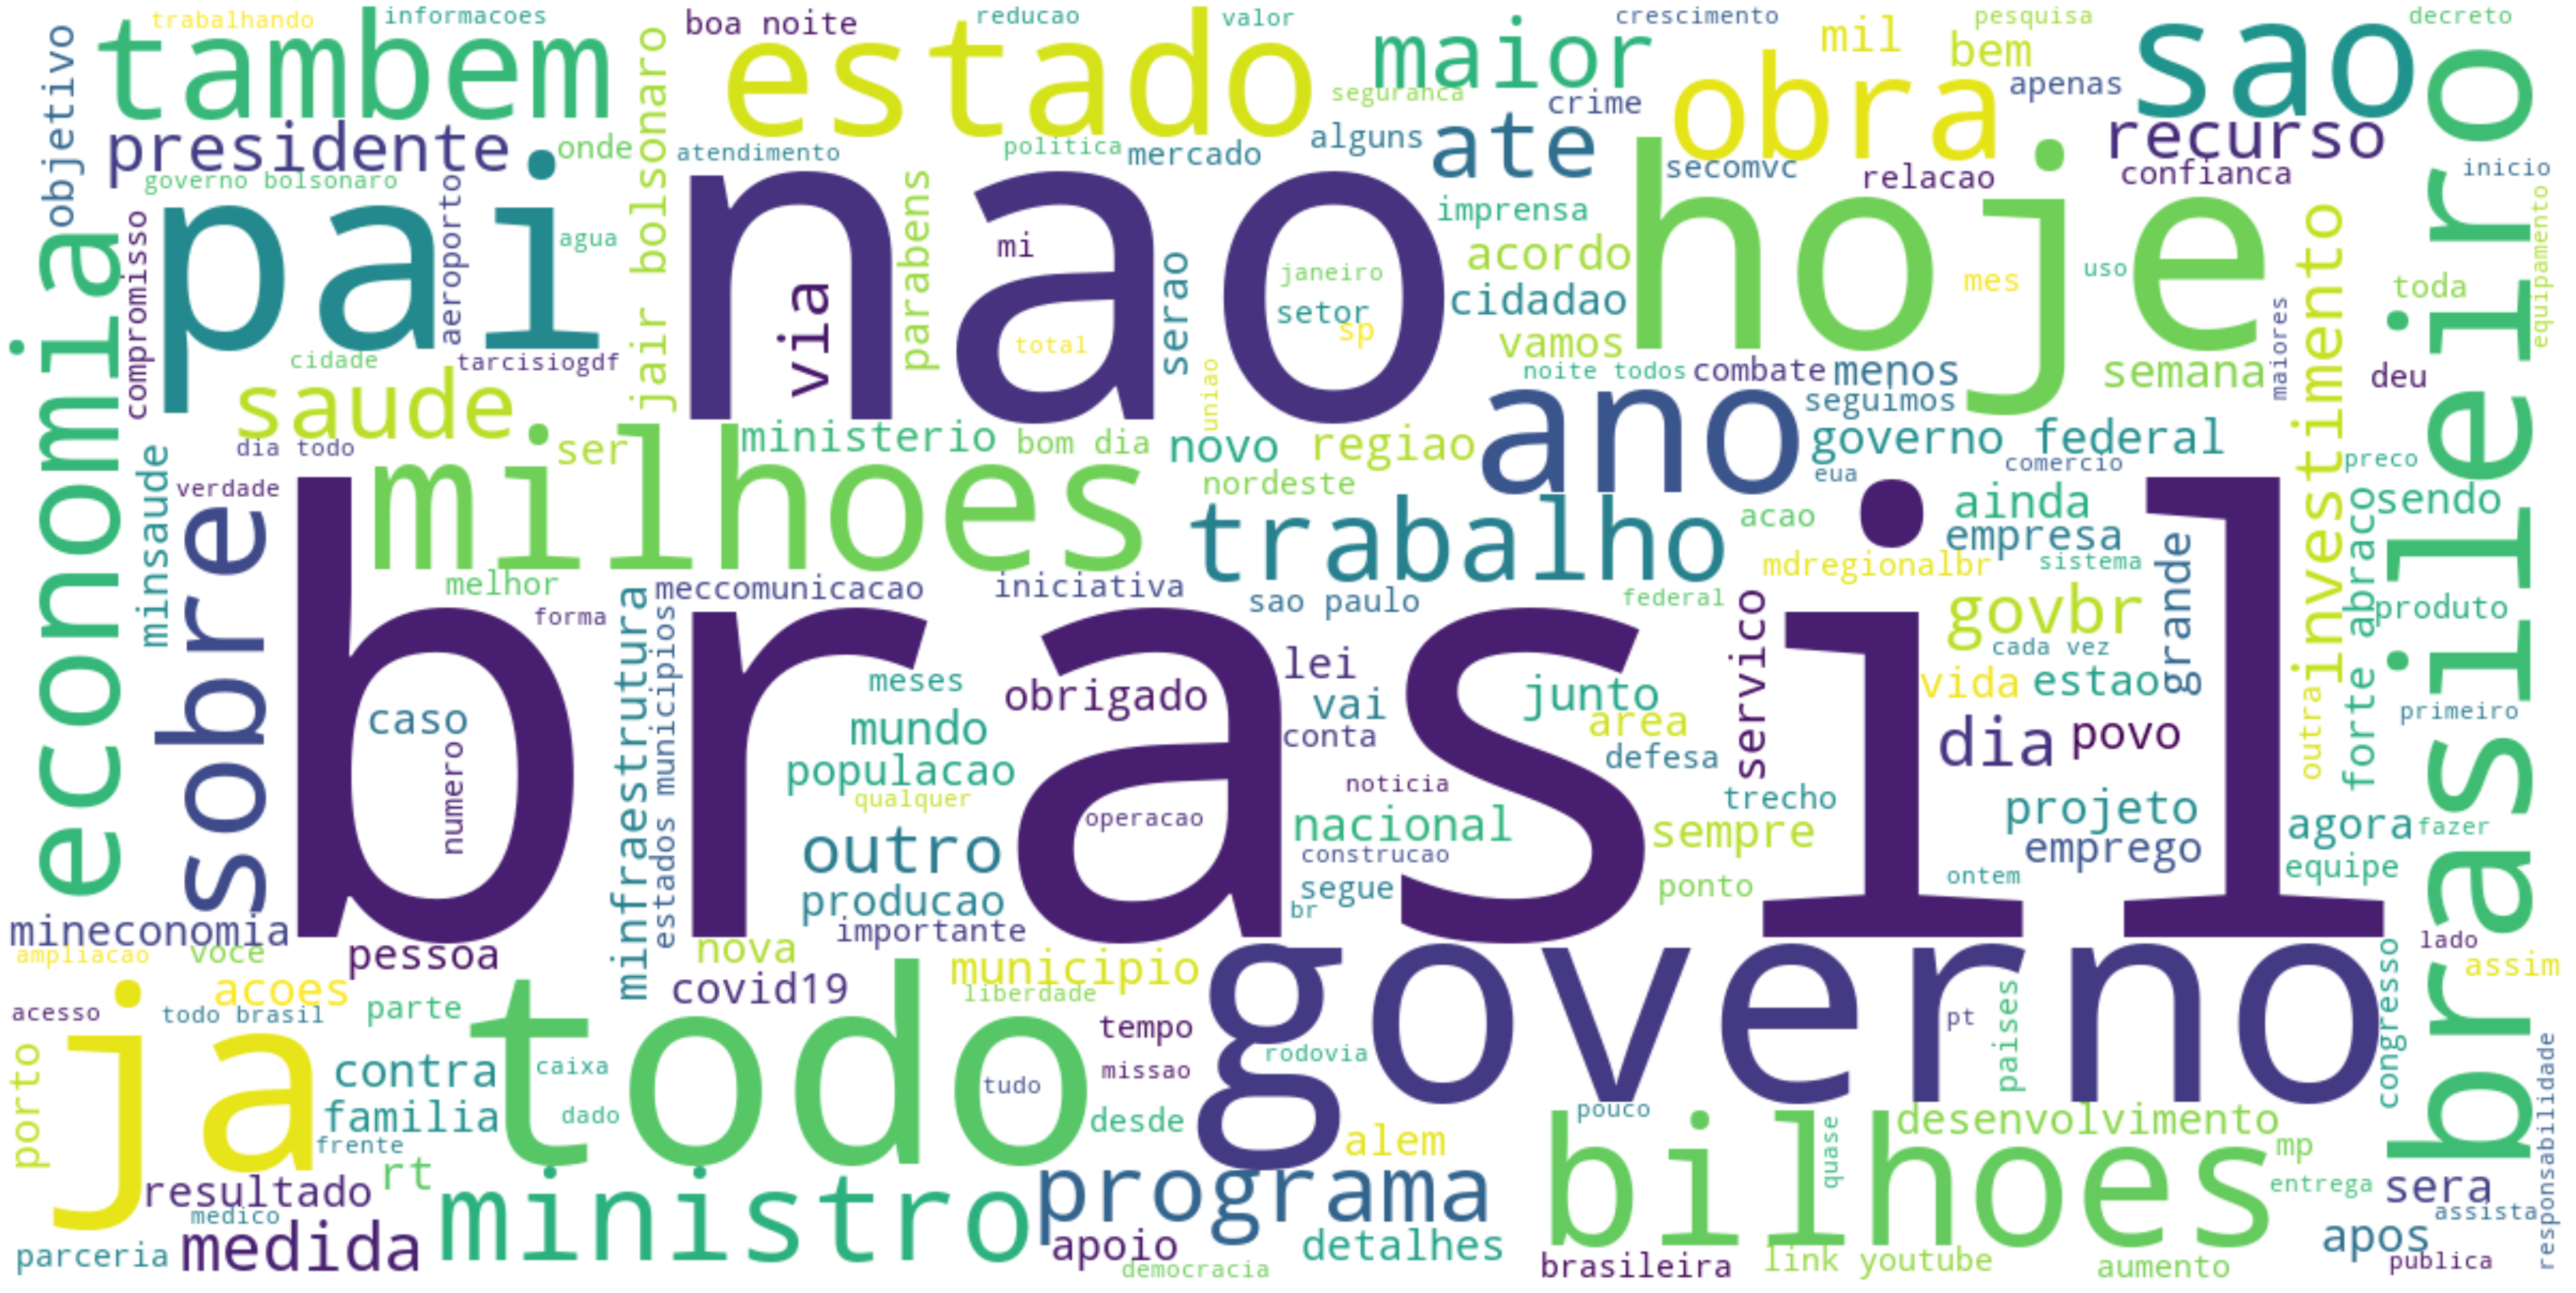

In [12]:
wc = WordCloud(width=1200, height=600, background_color='white')
clean_string = ' '.join(
    [word for values in df['normalized'].values for word in values.split() if word or len(word) > 3]
)

wc.generate(clean_string)

plt.figure(figsize=(50,25))
plt.axis("off")
plt.tight_layout()
plt.imshow(wc, interpolation='bilinear')
plt.savefig(f'wordcloud.png')